Chapter 23
# 重心坐标系
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

## 定义三角形

In [2]:
# 等边三角形
corners = np.array([[0, 0], [1, 0], [0.5,0.75**0.5]]).T
# 等腰直角三角形
# corners = np.array([[0, 0], [1, 0], [0, 1]]).T
# 任意三角形
# corners = np.array([[0, 0.2], [0.9, 0], [0.3, 0.8]]).T
corners

array([[0.       , 1.       , 0.5      ],
       [0.       , 0.       , 0.8660254]])

## 三角网格

In [3]:
triangle = tri.Triangulation(corners[0,:], corners[1,:])
refiner = tri.UniformTriRefiner(triangle)
trimesh_2 = refiner.refine_triangulation(subdiv=2)
# 每个列向量代表一个三角网格坐标点
r_array = np.row_stack((trimesh_2.x,trimesh_2.y))

In [4]:
trimesh_2.x

array([0.   , 1.   , 0.5  , 0.5  , 0.75 , 0.25 , 0.25 , 0.875, 0.375,
       0.625, 0.5  , 0.125, 0.75 , 0.625, 0.375])

In [5]:
trimesh_2.y

array([0.        , 0.        , 0.8660254 , 0.        , 0.4330127 ,
       0.4330127 , 0.        , 0.21650635, 0.64951905, 0.21650635,
       0.4330127 , 0.21650635, 0.        , 0.64951905, 0.21650635])

In [6]:
r_array

array([[0.        , 1.        , 0.5       , 0.5       , 0.75      ,
        0.25      , 0.25      , 0.875     , 0.375     , 0.625     ,
        0.5       , 0.125     , 0.75      , 0.625     , 0.375     ],
       [0.        , 0.        , 0.8660254 , 0.        , 0.4330127 ,
        0.4330127 , 0.        , 0.21650635, 0.64951905, 0.21650635,
        0.4330127 , 0.21650635, 0.        , 0.64951905, 0.21650635]])

### 直角坐标系坐标

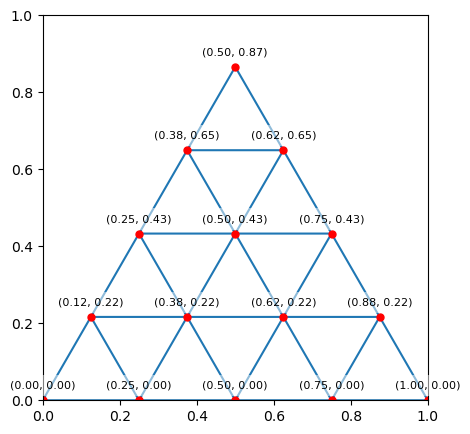

In [7]:
fig, ax = plt.subplots(figsize = (5,5))
plt.triplot(trimesh_2)
plt.plot(r_array[0,:], 
         r_array[1,:], 
         '.r', 
         markersize = 10)

for x_idx, y_idx in zip(trimesh_2.x, trimesh_2.y):
    
    text_idx = ('(' + format(x_idx, '.2f') + 
                ', ' + format(y_idx, '.2f') + ')')
    plt.text(x_idx, y_idx+0.03, 
             text_idx,
             fontsize = 8, 
             horizontalalignment = 'center',
             bbox=dict(facecolor='w', alpha=0.5, edgecolor = 'None'))
ax.set_aspect('equal')
ax.set_xlim(0,1); ax.set_ylim(0,1)
plt.savefig('1.svg')
plt.show()


### 坐标转换

In [8]:
# 提取大三角形的三个顶点列向量 (坐标点)
r1 = corners[:,[0]]
r2 = corners[:,[1]]
r3 = corners[:,[2]]
# 构造矩阵T
T = np.column_stack((r1 - r3,r2 - r3))
# 计算 theta_1和theta_2
theta_1_2 = np.linalg.inv(T) @ (r_array - r3)
# 计算theta_3
theta_3 = 1 - theta_1_2[0,:] - theta_1_2[1,:]

# 创建theta坐标，每一列代表一个重心坐标系坐标
# r_array和theta_1_2_3每一列一一对应
theta_1_2_3 = np.row_stack((theta_1_2,theta_3))

# 对重心坐标进行截断，避免超出 [0,1] 区间
theta_1_2_3 = np.clip(theta_1_2_3, 1e-6, 1.0 - 1e-6)
# numpy.clip(a, a_min, a_max, out=None) 
# 其中a是一个数组，后面两个参数分别表示最小和最大值，
# 将数组中的元素限制在a_min, a_max之间，
# 大于a_max的就使得它等于 a_max，
# 小于a_min,的就使得它等于a_min

### 重心坐标系坐标

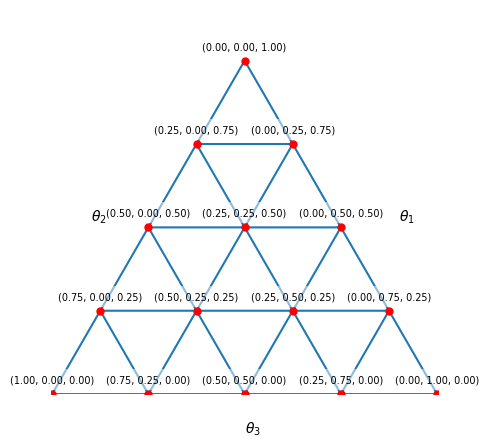

In [9]:
fig, ax = plt.subplots(figsize = (5,5))

plt.triplot(trimesh_2)
plt.plot(r_array[0,:], 
         r_array[1,:], 
         '.r', 
         markersize = 10)

for theta_idx,x_idx,y_idx in zip(theta_1_2_3.T,
                                 trimesh_2.x, 
                                 trimesh_2.y):
    
    theta_1 = theta_idx[0]
    theta_2 = theta_idx[1]
    theta_3 = theta_idx[2]
    
    text_idx = ('(' + format(theta_1, '.2f') + 
    ', ' + format(theta_2, '.2f') + 
    ', ' + format(theta_3, '.2f') + ')')
    
    plt.text(x_idx, y_idx+0.03, text_idx, 
             fontsize = 7, 
             horizontalalignment = 'center',
             bbox=dict(facecolor='w', 
                       alpha=0.5, 
                       edgecolor = 'None'))
plt.axis('equal')
plt.xlim(0, 1)
plt.text(0.9, 0.45,  r'$\theta_1$')
plt.text(0.1, 0.45, r'$\theta_2$')
plt.text(0.5, -0.1,  r'$\theta_3$')

ax.set_aspect('equal')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axis('off')
plt.savefig('2.svg')
plt.show()


参考：  
https://en.wikipedia.org/wiki/Barycentric_coordinate_system  
https://mathworld.wolfram.com/BarycentricCoordinates.html